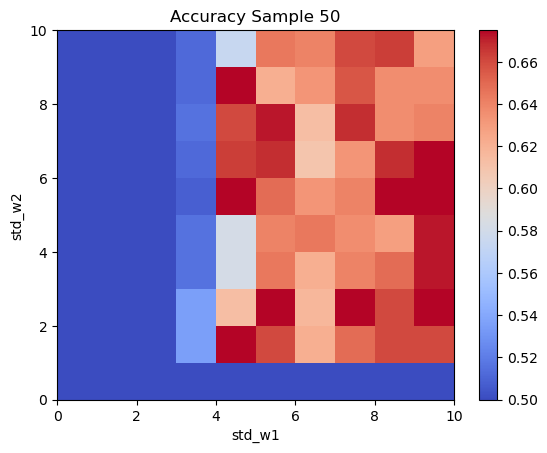

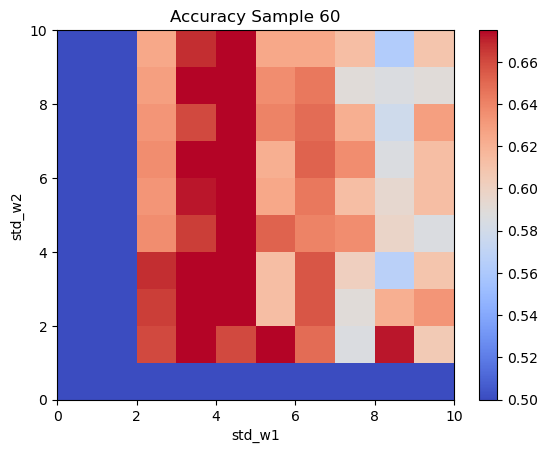

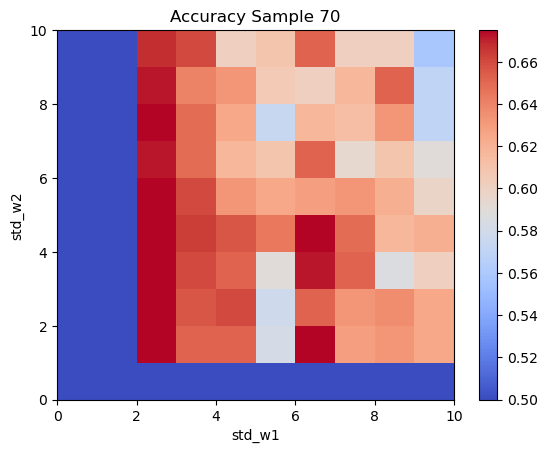

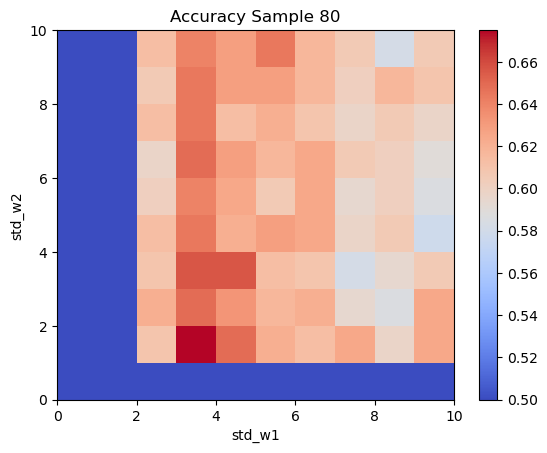

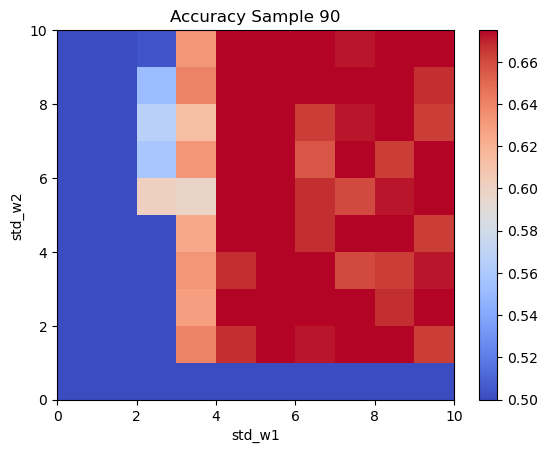

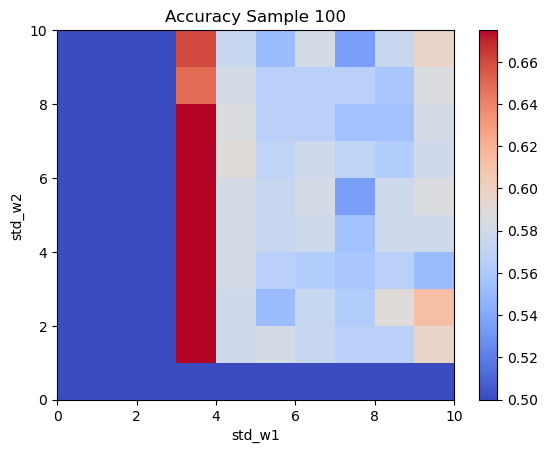

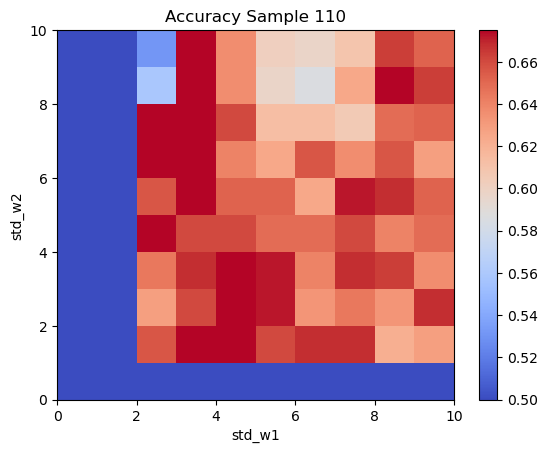

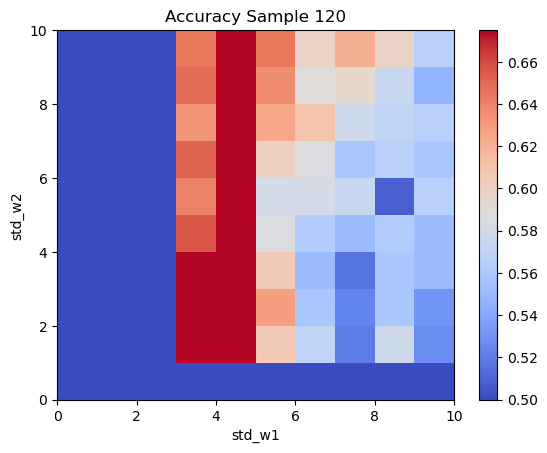

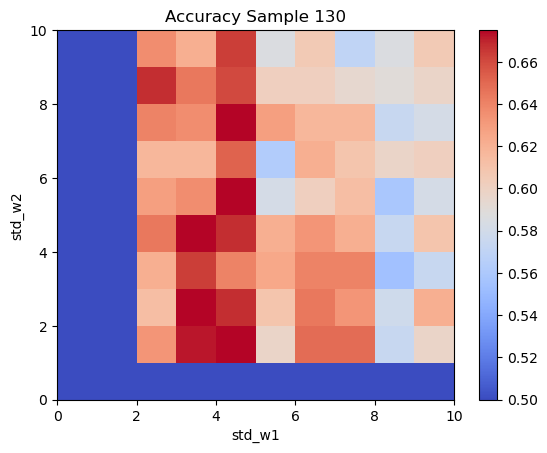

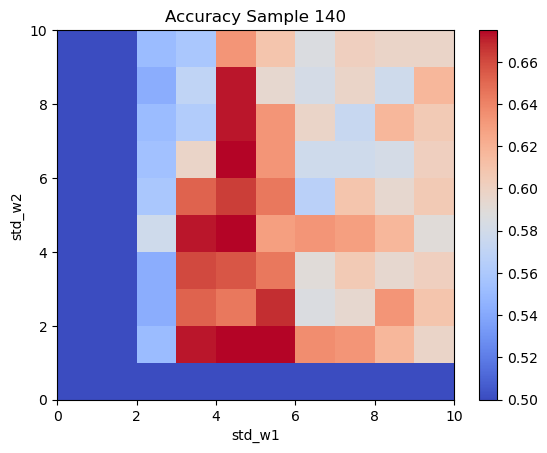

In [11]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input25sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(std_w_range,std_w_range)
accuracy_10_samples = np.zeros((10,10,10))
for (i, sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(data['accuracy_w1_w2'].T, cmap ='coolwarm', vmin=0.50, vmax = 0.675)
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]

In [12]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.57773438, 0.575     , 0.57460937, 0.58515625,
        0.58320313, 0.58164063, 0.58359375, 0.5703125 , 0.56054688],
       [0.4921875 , 0.66640625, 0.65820312, 0.65507812, 0.64570313,
        0.6390625 , 0.6359375 , 0.63007813, 0.63398438, 0.63007813],
       [0.4921875 , 0.6640625 , 0.65585938, 0.65351563, 0.65390625,
        0.66210938, 0.65390625, 0.65703125, 0.65898437, 0.6375    ],
       [0.4921875 , 0.63632813, 0.63164062, 0.63046875, 0.63046875,
        0.62382812, 0.6203125 , 0.62773437, 0.62070313, 0.62265625],
       [0.4921875 , 0.63554687, 0.62382812, 0.62265625, 0.63320312,
        0.615625  , 0.62148437, 0.615625  , 0.61015625, 0.61914062],
       [0.4921875 , 0.62148437, 0.6167968

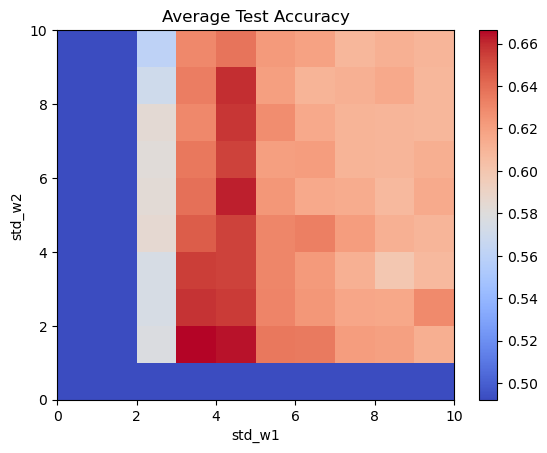

In [13]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm')
plt.colorbar(a)
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_title('Average Test Accuracy')

fig.savefig("25_inputs_average_accuracy_grid_over_10_samples.png".format(sample))

In [14]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_accuracy_grid_10_by_10_10_samples.shape)

In [15]:
best_w1_w2

(3, 1)

In [16]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [17]:
average_accuracy_grid_10_by_10_10_samples[3]

array([0.4921875 , 0.66640625, 0.65820312, 0.65507812, 0.64570313,
       0.6390625 , 0.6359375 , 0.63007813, 0.63398438, 0.63007813])

In [18]:
average_accuracy_grid_10_by_10_10_samples[:,1]

array([0.4921875 , 0.4921875 , 0.57773438, 0.66640625, 0.6640625 ,
       0.63632813, 0.63554687, 0.62148437, 0.61992187, 0.61289063])

In [19]:
average_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [20]:
data = {}
data['N'] = 25
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = 0.05/0.3445
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = 0.05/0.3445
np.savez("25_input_neurons_w1_w2.npz",**data)